# Vocoder Test

This Script aims to test if we can transform a sound to a MEL Spectrogam and then reverse transform it to a sound without loosing too much information.

In [6]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [9]:
y, sr = librosa.load("data\sample\looperman-l-3465391-0345738-dark-piano-loop-192.wav")
t = np.arange(0, y.shape[0]/sr, 1/sr)

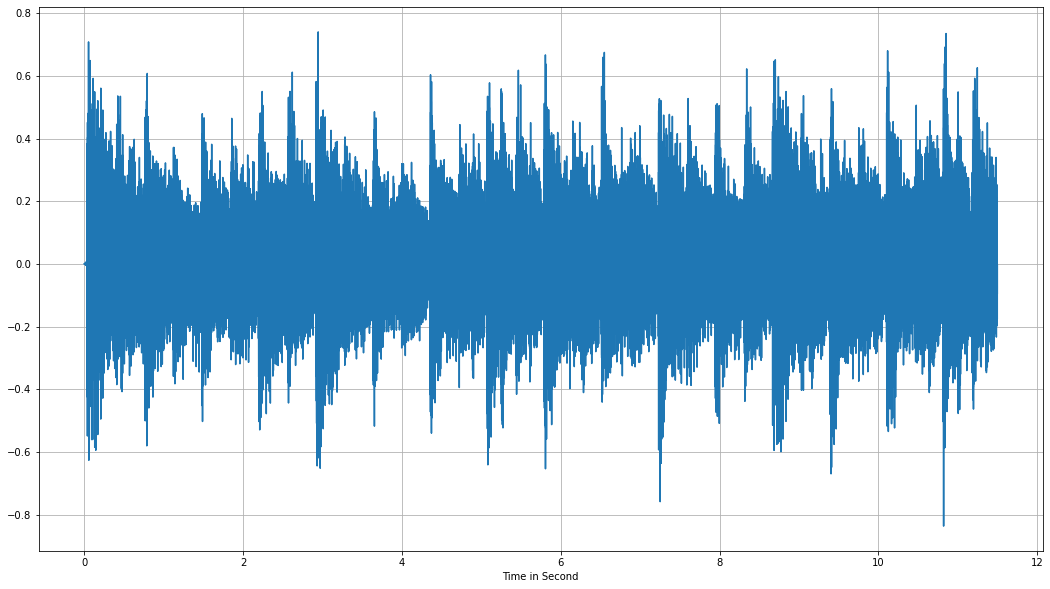

In [12]:
plt.figure(figsize=(18, 10))
plt.plot(t, y)
plt.grid()
plt.xlabel("Time in Second")
plt.show()

In [16]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

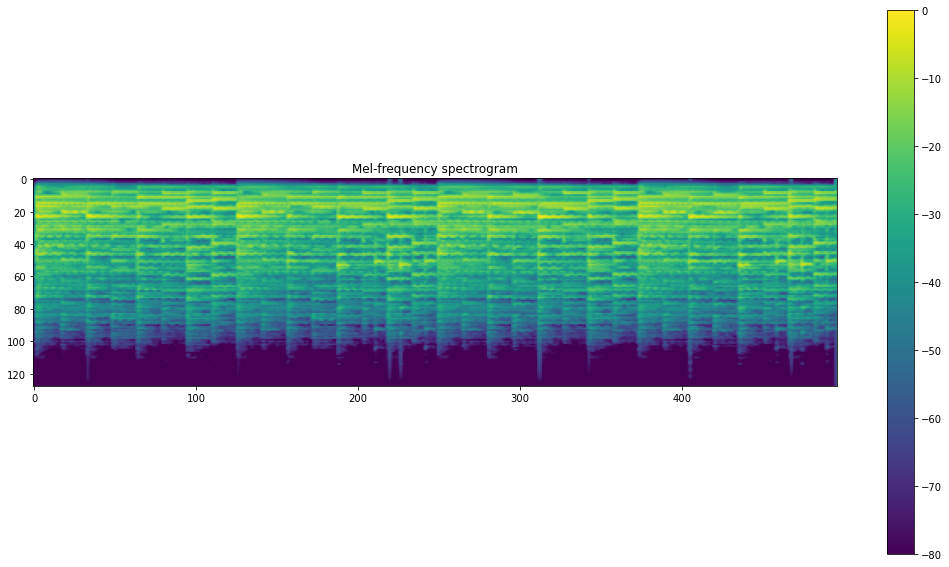

In [22]:
plt.figure(figsize=(18 ,10))
ax = plt.subplot(111)
S_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)
pos = plt.imshow(S_dB)
plt.colorbar(pos)
ax.set(title='Mel-frequency spectrogram')

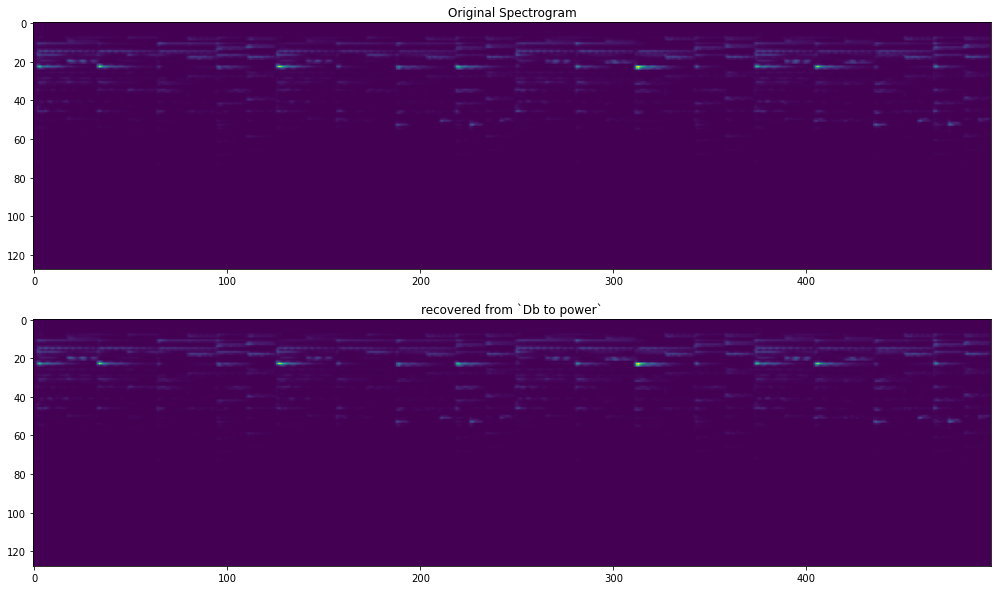

In [23]:
test= librosa.db_to_power(S_dB)
plt.figure(figsize=(18, 10))

ax = plt.subplot(211)
ax.set_title("Original Spectrogram")
plt.imshow(mel_spectrogram)

ax = plt.subplot(212)
ax.set_title("recovered from `Db to power`")
plt.imshow(test)

In [24]:
y_recovered = librosa.feature.inverse.mel_to_audio(mel_spectrogram, sr=sr)

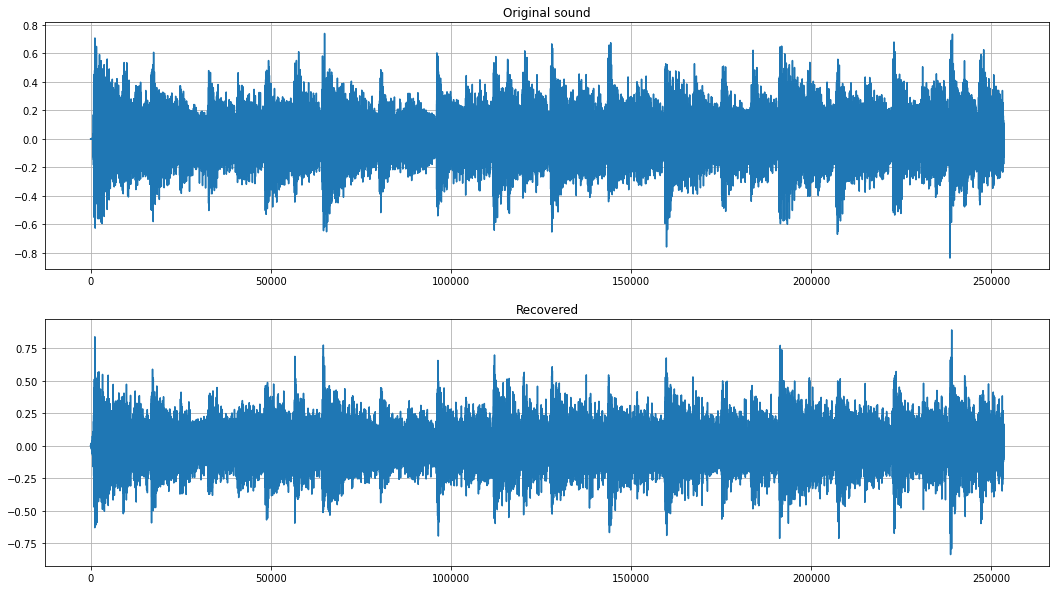

In [26]:
plt.figure(figsize=(18, 10))

ax = plt.subplot(211)
ax.set_title("Original sound")
plt.plot(y)
plt.grid()

ax = plt.subplot(212)
ax.set_title("Recovered")
plt.plot(y_recovered)
plt.grid()

In [29]:
import soundfile as sf

sf.write('data/sample/recovered.wav', y, sr)